# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [1]:
## please add the essential libraries

# YOUR CODE HERE
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Model, layers
from keras.callbacks import ReduceLROnPlateau

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [2]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = './pictures/train'
validation_data_dir = './pictures/val'
test_data_dir       = './pictures/test'

epochs = 50
batch_size = 16

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

#datagen is augmenting training data while datagen_test augments validation and test data only
datagen = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)


# Your Code HERE
train_generator = datagen.flow_from_directory(directory= train_data_dir,
                                              target_size=(img_width, img_height),
                                              color_mode="rgb", class_mode='categorical', 
                                              batch_size=batch_size,shuffle = True)

valid_generator = datagen_test.flow_from_directory(directory= validation_data_dir, target_size=(img_width, img_height), 
                                              color_mode="rgb", 
                                              class_mode='categorical', 
                                              batch_size=batch_size,shuffle = True)

test_generator  = datagen_test.flow_from_directory(directory= test_data_dir,target_size=(img_width, img_height),  
                                              color_mode="rgb", class_mode='categorical', 
                                              batch_size=batch_size,shuffle = True)



# please print the number of samples in each folder 
# Your Code HERE
print("The number of samples in train are", train_generator.samples)
print("The number of samples in validation are", valid_generator.samples)
print("The number of samples in test are", test_generator.samples)

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
The number of samples in train are 4176
The number of samples in validation are 1392
The number of samples in test are 1392


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [3]:
from tensorflow.keras.layers import BatchNormalization
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (224, 224, 3)

# define the Convolutional Neural Network
model = Sequential()

#1st conv2d layer with maxpooling
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPool2D(pool_size = (2,2)))

#2nd conv2d layer with maxpooling
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))

#3rd conv2d layer with maxpooling
model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [4]:
# Compiling the model and training including the files of compile and fit
#Your code 
#Adam Optimizer with set learning rate
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model with training and validation set
history = model.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,batch_size=batch_size, 
          epochs=epochs,verbose = 1,validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size)

Epoch 1/50
261/261 [==============================] - 38s 134ms/step - loss: 2.1385 - accuracy: 0.2011 - val_loss: 1.6324 - val_accuracy: 0.3973
Epoch 2/50
261/261 [==============================] - 34s 129ms/step - loss: 1.7231 - accuracy: 0.3673 - val_loss: 1.2095 - val_accuracy: 0.6063
Epoch 3/50
261/261 [==============================] - 34s 130ms/step - loss: 1.4762 - accuracy: 0.4741 - val_loss: 1.1952 - val_accuracy: 0.5388
Epoch 4/50
261/261 [==============================] - 33s 127ms/step - loss: 1.2751 - accuracy: 0.5524 - val_loss: 0.8914 - val_accuracy: 0.7342
Epoch 5/50
261/261 [==============================] - 35s 134ms/step - loss: 1.1611 - accuracy: 0.5943 - val_loss: 0.8672 - val_accuracy: 0.7141
Epoch 6/50
261/261 [==============================] - 33s 127ms/step - loss: 1.0793 - accuracy: 0.6260 - val_loss: 0.6740 - val_accuracy: 0.8010
Epoch 7/50
261/261 [==============================] - 34s 129ms/step - loss: 1.0055 - accuracy: 0.6468 - val_loss: 0.7969 - val_ac

%Test

In [5]:
scores = model.evaluate(test_generator)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

87/87 [==============================] - 7s 80ms/step - loss: 0.2662 - accuracy: 0.9102
accuracy: 91.02%


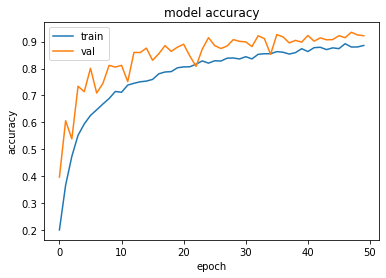

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

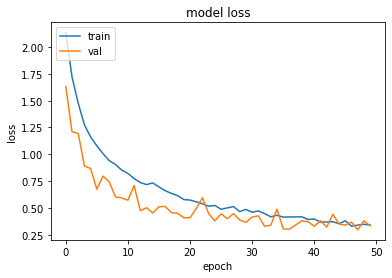

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [8]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
# Your code HERE
input_shape = (224, 224, 3)
modelL1 = Sequential()
# Your Code HERE

modelL1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l1(1e-3),input_shape=input_shape))
modelL1.add(MaxPool2D(pool_size = (2,2)))
modelL1.add(BatchNormalization())

modelL1.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu',kernel_regularizer=tf.keras.regularizers.l1(1e-3),padding='same'))
modelL1.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))
modelL1.add(BatchNormalization())

modelL1.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu',kernel_regularizer=tf.keras.regularizers.l1(1e-3), padding='same'))
modelL1.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))
modelL1.add(BatchNormalization())

modelL1.add(Flatten())
modelL1.add(Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l1(1e-3)))
modelL1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                      

In [9]:
modelL1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
historyL1 = modelL1.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,batch_size=batch_size, 
          epochs=epochs,verbose = 1,validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size)

Epoch 1/50
261/261 [==============================] - 35s 133ms/step - loss: 9.8434 - accuracy: 0.2433 - val_loss: 8.7957 - val_accuracy: 0.1516
Epoch 2/50
261/261 [==============================] - 35s 133ms/step - loss: 5.1416 - accuracy: 0.3475 - val_loss: 6.1830 - val_accuracy: 0.1243
Epoch 3/50
261/261 [==============================] - 34s 130ms/step - loss: 4.1642 - accuracy: 0.3954 - val_loss: 3.7175 - val_accuracy: 0.3966
Epoch 4/50
261/261 [==============================] - 35s 132ms/step - loss: 3.4805 - accuracy: 0.4571 - val_loss: 3.4018 - val_accuracy: 0.4274
Epoch 5/50
261/261 [==============================] - 34s 132ms/step - loss: 3.1911 - accuracy: 0.4875 - val_loss: 2.8661 - val_accuracy: 0.6365
Epoch 6/50
261/261 [==============================] - 36s 136ms/step - loss: 2.8971 - accuracy: 0.5237 - val_loss: 5.0351 - val_accuracy: 0.3348
Epoch 7/50
261/261 [==============================] - 35s 133ms/step - loss: 2.6994 - accuracy: 0.5560 - val_loss: 2.6760 - val_ac

In [10]:
scoresL1 = modelL1.evaluate(test_generator)
print("%s: %.2f%%" % (modelL1.metrics_names[1], scoresL1[1]*100))

87/87 [==============================] - 3s 31ms/step - loss: 8.7932 - accuracy: 0.1494
accuracy: 14.94%


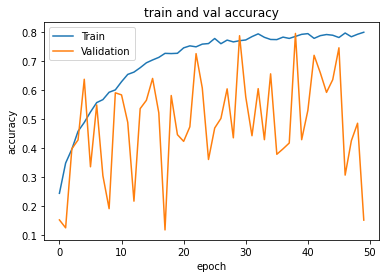

In [11]:
plt.plot(historyL1.history['accuracy'])
plt.plot(historyL1.history['val_accuracy'])
plt.title('train and val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

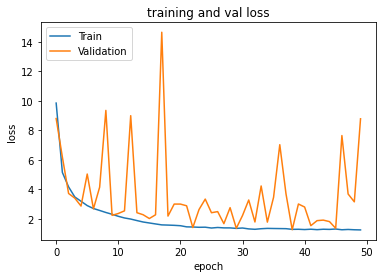

In [12]:
# summarize history for loss
plt.plot(historyL1.history['loss'])
plt.plot(historyL1.history['val_loss'])
plt.title('training and val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [13]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE
modelL2 = Sequential()

modelL2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-3),input_shape=input_shape))
modelL2.add(MaxPool2D(pool_size = (2,2)))
modelL2.add(BatchNormalization())

modelL2.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-3),padding='same'))
modelL2.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))
modelL2.add(BatchNormalization())

modelL2.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-3), padding='same'))
modelL2.add(MaxPool2D(pool_size = (2,2), strides = (4,4)))
modelL2.add(BatchNormalization())

modelL2.add(Flatten())
modelL2.add(Dense(10, activation='softmax'))
modelL2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                      

In [14]:
modelL2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
historyL2 = modelL2.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size,batch_size=batch_size, 
          epochs=epochs,verbose = 1,validation_data=valid_generator, validation_steps=valid_generator.samples//batch_size)

Epoch 1/50
261/261 [==============================] - 35s 133ms/step - loss: 5.1668 - accuracy: 0.2548 - val_loss: 2.7929 - val_accuracy: 0.4490
Epoch 2/50
261/261 [==============================] - 34s 130ms/step - loss: 2.4056 - accuracy: 0.3937 - val_loss: 3.1668 - val_accuracy: 0.2478
Epoch 3/50
261/261 [==============================] - 35s 134ms/step - loss: 2.0152 - accuracy: 0.4454 - val_loss: 4.6103 - val_accuracy: 0.1430
Epoch 4/50
261/261 [==============================] - 35s 133ms/step - loss: 1.6957 - accuracy: 0.5101 - val_loss: 1.7703 - val_accuracy: 0.5057
Epoch 5/50
261/261 [==============================] - 36s 137ms/step - loss: 1.5125 - accuracy: 0.5663 - val_loss: 1.0343 - val_accuracy: 0.7119
Epoch 6/50
261/261 [==============================] - 34s 131ms/step - loss: 1.3644 - accuracy: 0.6063 - val_loss: 1.2805 - val_accuracy: 0.6307
Epoch 7/50
261/261 [==============================] - 36s 139ms/step - loss: 1.2895 - accuracy: 0.6214 - val_loss: 7.2903 - val_ac

In [15]:
scoresL2 = modelL2.evaluate(test_generator)
print("%s: %.2f%%" % (modelL2.metrics_names[1], scoresL2[1]*100))

87/87 [==============================] - 3s 35ms/step - loss: 0.9263 - accuracy: 0.8132
accuracy: 81.32%


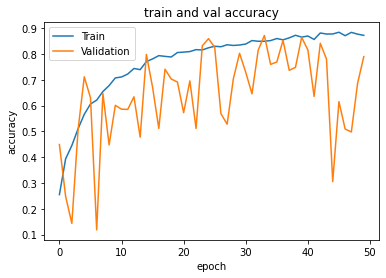

In [16]:
plt.plot(historyL2.history['accuracy'])
plt.plot(historyL2.history['val_accuracy'])
plt.title('train and val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

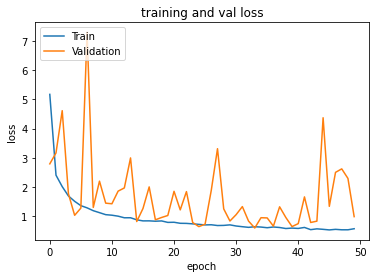

In [17]:
# summarize history for loss
plt.plot(historyL2.history['loss'])
plt.plot(historyL2.history['val_loss'])
plt.title('training and val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

# ResNet50 model fine-tuned

In [18]:
# load pre-trained resnet 50 from libarary
# your Code HERE
from tensorflow.keras.applications import ResNet50

#Initializing ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (224,224,3), classes = 10)

# Fine-tune the model to fit our project  
# your Code HERE
#Adding layers to the ResNet50
model_resnet=Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'),input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(10,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)              

## Compiling ResNet50 with combination of freezed layers 2 to 5

In [19]:
#Compiling ResNet50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

# define the freeze layers 
# your Code HERE
#Still not talking about our train/test data or any pre-processing.
for layers in model_resnet.layers[2:5]:
    layers.trainable=False

# Please compile the new model
model_resnet.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

#Train the model with training and validation set
model_resnet.fit(train_generator, epochs=5, 
                           steps_per_epoch = train_generator.samples//batch_size,
                           validation_data = valid_generator, 
                           validation_steps = valid_generator.samples//batch_size, callbacks = [lrr], verbose=1)


Epoch 1/5


C:\ProgramData\Miniconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


261/261 [==============================] - 51s 177ms/step - loss: 2.4417 - accuracy: 0.1401 - val_loss: 2.3368 - val_accuracy: 0.1034 - lr: 0.0010
Epoch 2/5
261/261 [==============================] - 46s 175ms/step - loss: 1.9728 - accuracy: 0.2632 - val_loss: 2.3213 - val_accuracy: 0.1013 - lr: 0.0010
Epoch 3/5
261/261 [==============================] - 46s 176ms/step - loss: 1.5448 - accuracy: 0.4143 - val_loss: 2.1318 - val_accuracy: 0.2062 - lr: 0.0010
Epoch 4/5
261/261 [==============================] - 46s 175ms/step - loss: 1.1651 - accuracy: 0.5675 - val_loss: 0.9750 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 5/5
261/261 [==============================] - 46s 175ms/step - loss: 0.8774 - accuracy: 0.6830 - val_loss: 0.4028 - val_accuracy: 0.8614 - lr: 0.0010


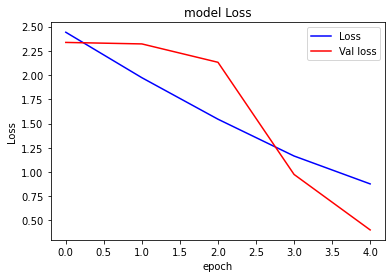

In [20]:
#Plotting the training and validation loss

#Training loss and validation loss
plt.plot(model_resnet.history.history['loss'],color='b',label='Training Loss')
plt.plot(model_resnet.history.history['val_loss'],color='r',label='Validation Loss')
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val loss'], loc='upper right')
plt.show()

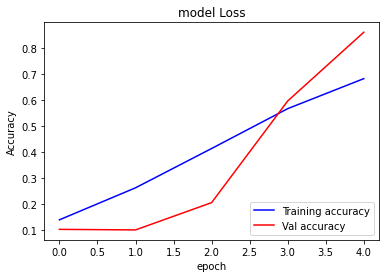

In [21]:
#Training accuracy and validation accuracy
plt.plot(model_resnet.history.history['accuracy'],color='b',label='Training  Accuracy')
plt.plot(model_resnet.history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.title('model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Val accuracy'], loc='lower right')
plt.show()

## Compiling ResNet50 with combination of freezed layers 4 to 7

In [22]:
#Compiling ResNet50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

for layers in model_resnet.layers[4:7]:
    layers.trainable=False

model_resnet.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)


#Training the ResNet50 model
model_resnet.fit(train_generator, epochs=5, 
                           steps_per_epoch = train_generator.samples//batch_size,
                           validation_data = valid_generator, 
                           validation_steps = valid_generator.samples//batch_size, callbacks = [lrr], verbose=1)


Epoch 1/5
261/261 [==============================] - 50s 178ms/step - loss: 0.6393 - accuracy: 0.7888 - val_loss: 0.7104 - val_accuracy: 0.7701 - lr: 0.0010
Epoch 2/5
261/261 [==============================] - 46s 174ms/step - loss: 0.4864 - accuracy: 0.8412 - val_loss: 0.2146 - val_accuracy: 0.9224 - lr: 0.0010
Epoch 3/5
261/261 [==============================] - 46s 175ms/step - loss: 0.4291 - accuracy: 0.8659 - val_loss: 0.1717 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 4/5
261/261 [==============================] - 46s 175ms/step - loss: 0.3047 - accuracy: 0.9071 - val_loss: 0.3309 - val_accuracy: 0.9001 - lr: 0.0010
Epoch 5/5
261/261 [==============================] - 46s 175ms/step - loss: 0.2764 - accuracy: 0.9128 - val_loss: 0.1274 - val_accuracy: 0.9591 - lr: 0.0010


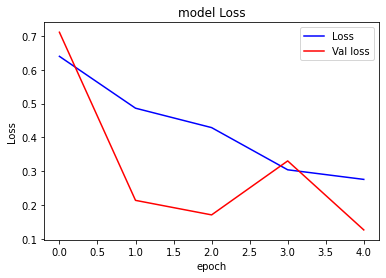

In [23]:
#Plotting the training and validation loss

#Training loss and validation loss
plt.plot(model_resnet.history.history['loss'],color='b',label='Training Loss')
plt.plot(model_resnet.history.history['val_loss'],color='r',label='Validation Loss')
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val loss'], loc='upper right')
plt.show()

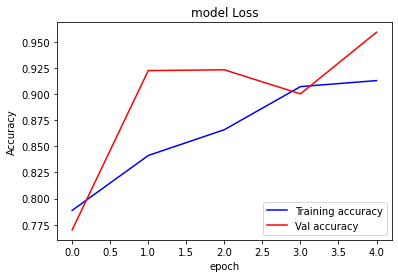

In [24]:
#Training accuracy and validation accuracy
plt.plot(model_resnet.history.history['accuracy'],color='b',label='Training  Accuracy')
plt.plot(model_resnet.history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.title('model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Val accuracy'], loc='lower right')
plt.show()

## Compiling ResNet50 with combination of freezed layers 6 to 9

In [25]:
#Compiling ResNet50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

for layers in model_resnet.layers[6:9]:
    layers.trainable=False

model_resnet.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)


#Training the ResNet50 model
model_resnet.fit(train_generator, epochs=5, 
                           steps_per_epoch = train_generator.samples//batch_size,
                           validation_data = valid_generator, 
                           validation_steps = valid_generator.samples//batch_size, callbacks = [lrr], verbose=1)

Epoch 1/5
261/261 [==============================] - 50s 178ms/step - loss: 0.2497 - accuracy: 0.9255 - val_loss: 0.2666 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 2/5
261/261 [==============================] - 46s 174ms/step - loss: 0.2371 - accuracy: 0.9313 - val_loss: 0.3350 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 3/5
261/261 [==============================] - 46s 175ms/step - loss: 0.1648 - accuracy: 0.9488 - val_loss: 0.2009 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 4/5
261/261 [==============================] - 46s 174ms/step - loss: 0.1613 - accuracy: 0.9533 - val_loss: 0.1169 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 5/5
261/261 [==============================] - 46s 176ms/step - loss: 0.1328 - accuracy: 0.9631 - val_loss: 0.1601 - val_accuracy: 0.9641 - lr: 0.0010


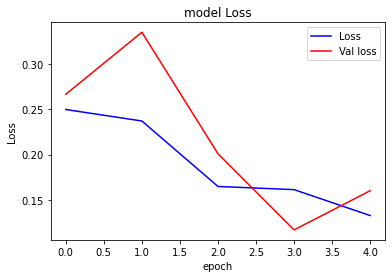

In [26]:
#Plotting the training and validation loss

#Training loss and validation loss
plt.plot(model_resnet.history.history['loss'],color='b',label='Training Loss')
plt.plot(model_resnet.history.history['val_loss'],color='r',label='Validation Loss')
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val loss'], loc='upper right')
plt.show()

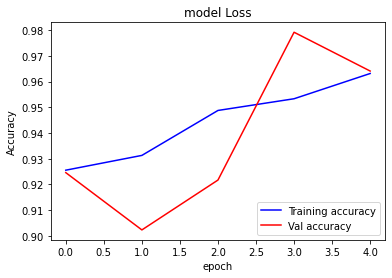

In [27]:
#Training accuracy and validation accuracy
plt.plot(model_resnet.history.history['accuracy'],color='b',label='Training  Accuracy')
plt.plot(model_resnet.history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.title('model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Val accuracy'], loc='lower right')
plt.show()